In [20]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
Patients_train=pd.read_csv(r'C:\Users\HomePC\Desktop\LP6\archive 1\Paitients_Files_Train.csv')
Patients_train

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


In [3]:
Patients_test=pd.read_csv(r'C:\Users\HomePC\Desktop\LP6\archive 1\Paitients_Files_Test.csv')
Patients_test

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0
...,...,...,...,...,...,...,...,...,...,...
164,ICU200773,10,101,76,48,180,32.9,0.171,63,1
165,ICU200774,2,122,70,27,0,36.8,0.340,27,1
166,ICU200775,5,121,72,23,112,26.2,0.245,30,1
167,ICU200776,1,126,60,0,0,30.1,0.349,47,1


## Column Understanding
PRG: Plasma glucose level is a measure of the amount of glucose (sugar) in the blood. High levels of plasma glucose can be a sign of diabetes.

PL: Blood work result 1 is a generic term for any blood test result. This feature could include any number of different tests, such as a complete blood count (CBC) or a chemistry panel.

PR: Blood pressure is the force of blood pushing against the walls of the arteries. High blood pressure can be a sign of heart disease or stroke.

SK: Blood work result 2 is another generic term for any blood test result. This feature could include any number of different tests, such as a liver function test or a kidney function test.

TS: Blood work result 3 is another generic term for any blood test result. This feature could include any number of different tests, such as an electrolyte panel or a thyroid function test.

M11: Body mass index (BMI) is a measure of body fat based on height and weight. A high BMI is a risk factor for obesity, which can lead to a number of health problems, including heart disease, stroke, and type 2 diabetes.

BD2: Blood work result 4 is another generic term for any blood test result. This feature could include any number of different tests, such as a coagulation test or an infectious disease test.

Age: Patient's age is a risk factor for sepsis. Older adults are more likely to develop sepsis than younger adults.

Insurance: Whether the patient has insurance is important because it can affect the patient's access to healthcare. Patients with insurance are more likely to receive preventive care and early treatment for sepsis.

Sepsis: Sepsis is a serious complication of an infection that can lead to organ failure and death. Early diagnosis and treatment of sepsis is crucial for improving patient outcomes.

## Hypothesis 
1. Plasma glucose level (PRG): Patients with higher plasma glucose levels may be at increased risk of developing sepsis. This is because high blood sugar levels can weaken the immune system and make it more difficult for the body to fight off infections.
2. Blood work result 1 (PL): Elevated levels of certain blood markers may be indicative of an underlying infection that could lead to sepsis. For instance, high levels of C-reactive protein (CRP) are a common sign of inflammation and infection.
3. Blood pressure (PR): Abnormally low blood pressure could be a symptom of sepsis, as it can indicate that the body is in shock and struggling to maintain adequate blood flow to vital organs.
4. Blood work result 2 (SK): Abnormal levels of certain blood enzymes, such as liver enzymes, could indicate organ dysfunction, which is a potential complication of sepsis.
5. Blood work result 3 (TS): Electrolyte imbalances, such as low sodium or high potassium levels, can disrupt the body's normal functions and contribute to the development of sepsis.
6. Body mass index (M11): Obesity (high BMI) is associated with an increased risk of sepsis, possibly due to its link to chronic inflammation and weakened immune function.
7. Blood work result 4 (BD2): The presence of certain bacteria or toxins in the bloodstream, as detected through blood cultures, is a direct sign of an infection that could lead to sepsis.
Age: Older adults are at higher risk of developing sepsis due to their weakened immune systems and increased susceptibility to infections.
8. Insurance: Having health insurance could provide patients with better access to healthcare and early diagnosis of sepsis, potentially improving patient outcomes.
9. Sepsis: The presence or absence of sepsis is the target variable we aim to predict using the other features.

In [4]:
Patients_train.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
Patients_train.value_counts()

ID         PRG  PL   PR  SK  TS   M11   BD2    Age  Insurance  Sepssis 
ICU200010  6    148  72  35  0    33.6  0.627  50   0          Positive    1
ICU200404  4    158  78  0   0    32.9  0.803  31   1          Positive    1
ICU200406  3    96   56  34  115  24.7  0.944  39   1          Negative    1
ICU200407  0    131  66  40  0    34.3  0.196  22   1          Positive    1
ICU200408  3    82   70  0   0    21.1  0.389  25   0          Negative    1
                                                                          ..
ICU200210  0    113  80  16  0    31.0  0.874  21   1          Negative    1
ICU200211  1    138  82  0   0    40.1  0.236  28   1          Negative    1
ICU200212  0    108  68  20  0    27.3  0.787  32   0          Negative    1
ICU200213  2    99   70  16  44   20.4  0.235  27   1          Negative    1
ICU200608  1    173  74  0   0    36.8  0.088  38   1          Positive    1
Name: count, Length: 599, dtype: int64

In [6]:
Patients_train_drop_ID=Patients_train.drop('ID', axis=1)
Patients_train_drop_ID

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,0,Negative
595,0,188,82,14,185,32.0,0.682,22,1,Positive
596,0,67,76,0,0,45.3,0.194,46,1,Negative
597,1,89,24,19,25,27.8,0.559,21,0,Negative


In [7]:
# Set display options
pd.set_option('display.max_columns', None)  # Show all columns
for col in Patients_train_drop_ID.columns:
    unique_values = Patients_train_drop_ID[col].unique()
    print(f"Column: {col}")
    print(f"Unique values: {unique_values}")
    print("-----------------------")

Column: PRG
Unique values: [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
-----------------------
Column: PL
Unique values: [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67]
-----------------------
Column: PR
Unique values: [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24]
-----------------------
Column: SK
Unique values: [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 2

In [8]:
# Use get_dummies to convert 'positive' and 'negative' to boolean
Patients_train = pd.get_dummies(Patients_train, columns=['Sepssis'], drop_first=True)



c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


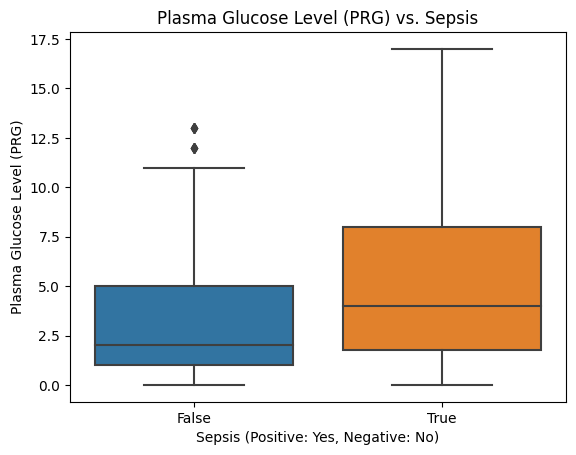

In [9]:
'''1. Plasma glucose level (PRG): Patients with higher plasma glucose levels may be at 
increased risk of developing sepsis. This is because high blood sugar levels can weaken the 
immune system and make it more difficult for the body to fight off infections.'''
# Create a box plot or violin plot
sns.boxplot(x='Sepssis_Positive', y='PRG', data=Patients_train)
plt.title('Plasma Glucose Level (PRG) vs. Sepsis')
plt.xlabel('Sepsis (Positive: Yes, Negative: No)')
plt.ylabel('Plasma Glucose Level (PRG)')
plt.show()

c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


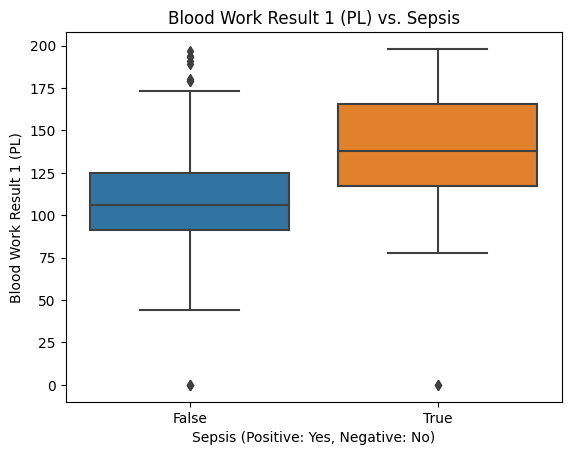

In [10]:
'''2. Blood work result 1 (PL): Elevated levels of certain blood markers may be indicative of 
an underlying infection that could lead to sepsis. For instance, high levels of C-reactive 
protein (CRP) are a common sign of inflammation and infection.'''
# Create a box plot or violin plot
sns.boxplot(x='Sepssis_Positive', y='PL', data=Patients_train)
plt.title('Blood Work Result 1 (PL) vs. Sepsis')
plt.xlabel('Sepsis (Positive: Yes, Negative: No)')
plt.ylabel('Blood Work Result 1 (PL)')
plt.show()

c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

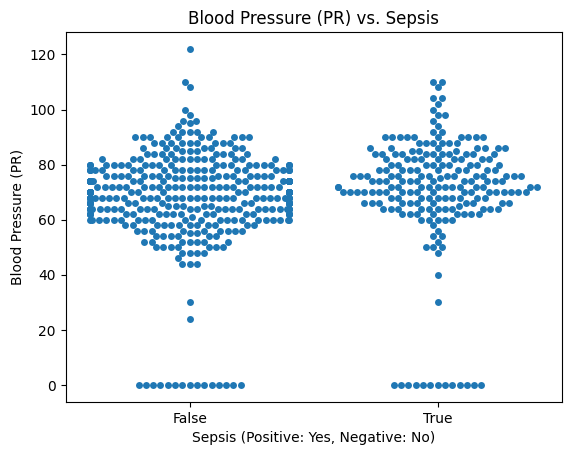

In [11]:
'''3. Blood pressure (PR): Abnormally low blood pressure could be a symptom of sepsis, 
as it can indicate that the body is in shock and struggling to maintain adequate 
blood flow to vital organs.'''
# Create a swarm plot
sns.swarmplot(x='Sepssis_Positive', y='PR', data=Patients_train)
plt.title('Blood Pressure (PR) vs. Sepsis')
plt.xlabel('Sepsis (Positive: Yes, Negative: No)')
plt.ylabel('Blood Pressure (PR)')
plt.show()

c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


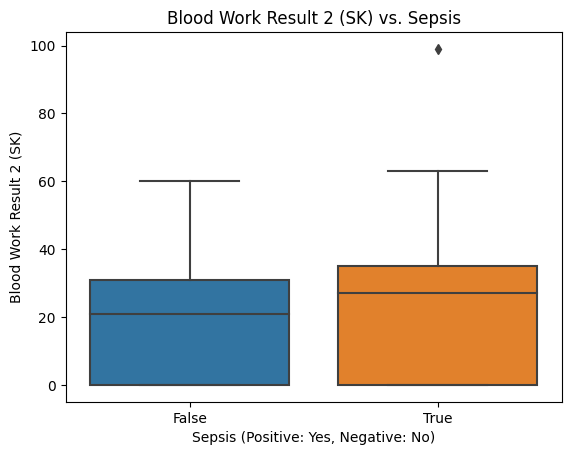

In [12]:
'''4. Blood work result 2 (SK): Abnormal levels of certain blood enzymes, 
such as liver enzymes, could indicate organ dysfunction, 
which is a potential complication of sepsis.'''
# Create a box plot or violin plot
sns.boxplot(x='Sepssis_Positive', y='SK', data=Patients_train)
plt.title('Blood Work Result 2 (SK) vs. Sepsis')
plt.xlabel('Sepsis (Positive: Yes, Negative: No)')
plt.ylabel('Blood Work Result 2 (SK)')
plt.show()

c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


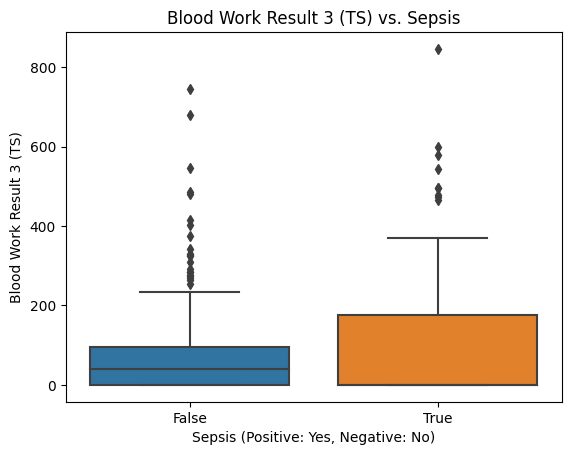

In [13]:
'''5. Blood work result 3 (TS): Electrolyte imbalances, such as low sodium or 
high potassium levels, can disrupt the body's normal functions and 
contribute to the development of sepsis.'''
# Create a box plot
sns.boxplot(x='Sepssis_Positive', y='TS', data=Patients_train)
plt.title('Blood Work Result 3 (TS) vs. Sepsis')
plt.xlabel('Sepsis (Positive: Yes, Negative: No)')
plt.ylabel('Blood Work Result 3 (TS)')
plt.show()

c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


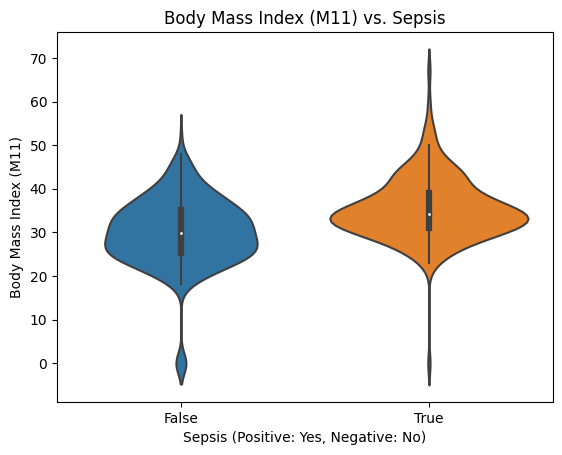

In [14]:
'''Body mass index (M11): Obesity (high BMI) is associated with an increased risk of sepsis, 
possibly due to its link to chronic inflammation and weakened immune function.'''
# Create a violin plot
sns.violinplot(x='Sepssis_Positive', y='M11', data=Patients_train)
plt.title('Body Mass Index (M11) vs. Sepsis')
plt.xlabel('Sepsis (Positive: Yes, Negative: No)')
plt.ylabel('Body Mass Index (M11)')
plt.show()

c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

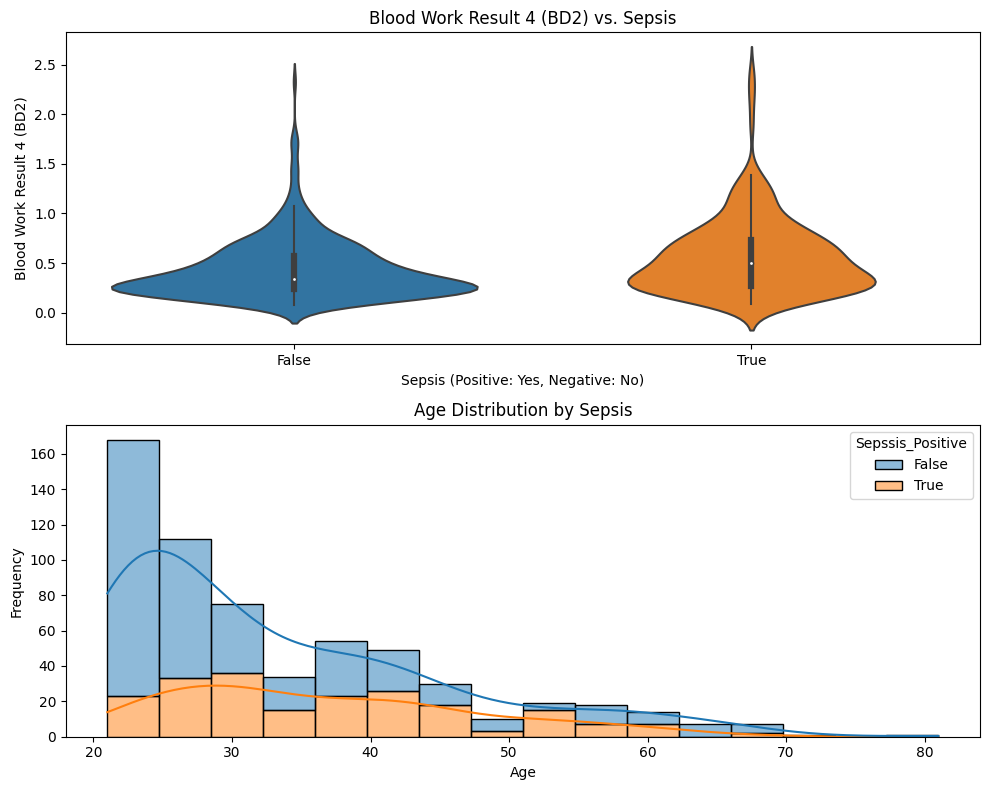

In [15]:
'''Blood work result 4 (BD2): The presence of certain bacteria or toxins in the bloodstream, as detected 
through blood cultures, is a direct sign of an infection that could lead to sepsis.Age: 
Older adults are at higher risk of developing sepsis due to their weakened immune systems 
and increased susceptibility to infections.'''
# Create subplots for Blood work result 4 (BD2) and Age
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Blood work result 4 (BD2) - Violin plot
sns.violinplot(x='Sepssis_Positive', y='BD2', data=Patients_train, ax=axes[0])
axes[0].set_title('Blood Work Result 4 (BD2) vs. Sepsis')
axes[0].set_xlabel('Sepsis (Positive: Yes, Negative: No)')
axes[0].set_ylabel('Blood Work Result 4 (BD2)')

# Age - Histogram
sns.histplot(x='Age', hue='Sepssis_Positive', data=Patients_train, multiple='stack', kde=True, ax=axes[1])
axes[1].set_title('Age Distribution by Sepsis')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [17]:
#Finding the correlation of all columns
# Calculate the correlation matrix
corrset=Patients_train.drop('ID', axis=1)
correlation_matrix = corrset.corr()


                       PRG        PL        PR        SK        TS       M11  \
PRG               1.000000  0.139541  0.116680 -0.080902 -0.054812  0.033482   
PL                0.139541  1.000000  0.143064  0.054430  0.339818  0.215949   
PR                0.116680  0.143064  1.000000  0.197535  0.095281  0.269482   
SK               -0.080902  0.054430  0.197535  1.000000  0.429068  0.377950   
TS               -0.054812  0.339818  0.095281  0.429068  1.000000  0.184747   
M11               0.033482  0.215949  0.269482  0.377950  0.184747  1.000000   
BD2              -0.052230  0.144665  0.008318  0.176592  0.218313  0.127675   
Age               0.532545  0.274057  0.225625 -0.121553 -0.011523  0.046117   
Insurance         0.084631  0.050993 -0.025365 -0.017360  0.041560  0.026826   
Sepssis_Positive  0.207115  0.449719  0.061086  0.075585  0.145892  0.315894   

                       BD2       Age  Insurance  Sepssis_Positive  
PRG              -0.052230  0.532545   0.084631    

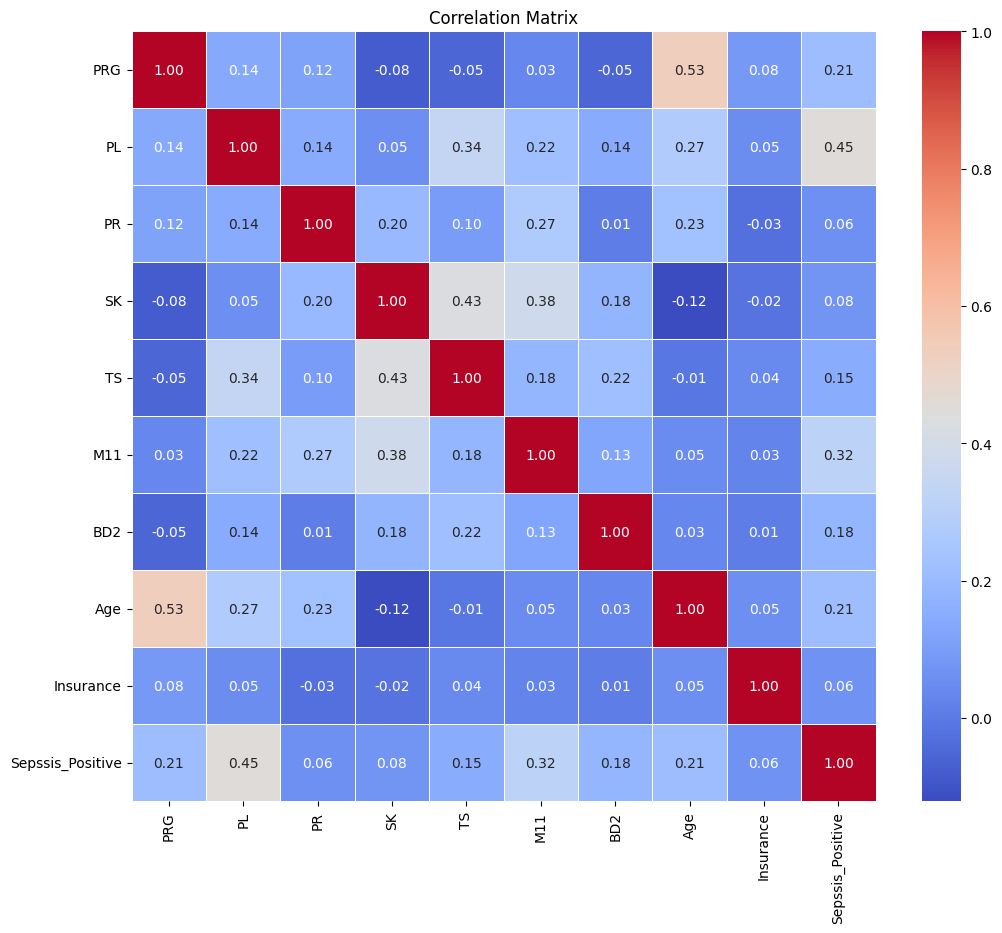

In [18]:
# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [26]:
#removing outliers 
# Extract numeric columns (assuming you want to standardize only numeric features)
numeric_columns = Patients_train.select_dtypes(include=[np.number]).columns

# Standardize the numeric columns
scaler = StandardScaler()
Patients_train[numeric_columns] = scaler.fit_transform(Patients_train[numeric_columns])

# Function to remove outliers using Z-score or IQR
def remove_outliers(df, method='z-score', threshold=3):
    if method == 'z-score':
        z_scores = np.abs(df[numeric_columns].apply(lambda x: (x - x.mean()) / x.std()))
        df_no_outliers = df[(z_scores < threshold).all(axis=1)]
    elif method == 'iqr':
        Q1 = df[numeric_columns].quantile(0.25)
        Q3 = df[numeric_columns].quantile(0.75)
        IQR = Q3 - Q1
        df_no_outliers = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    else:
        raise ValueError("Invalid method. Choose 'z-score' or 'iqr'.")
    
    return df_no_outliers

# Choose outlier removal method ('z-score' or 'iqr')
outlier_removal_method = 'z-score'

# Set outlier removal threshold
outlier_threshold = 3

# Remove outliers
Patients_train_no_outliers = remove_outliers(Patients_train, method=outlier_removal_method, threshold=outlier_threshold)

# Display the standardized and outlier-free DataFrame



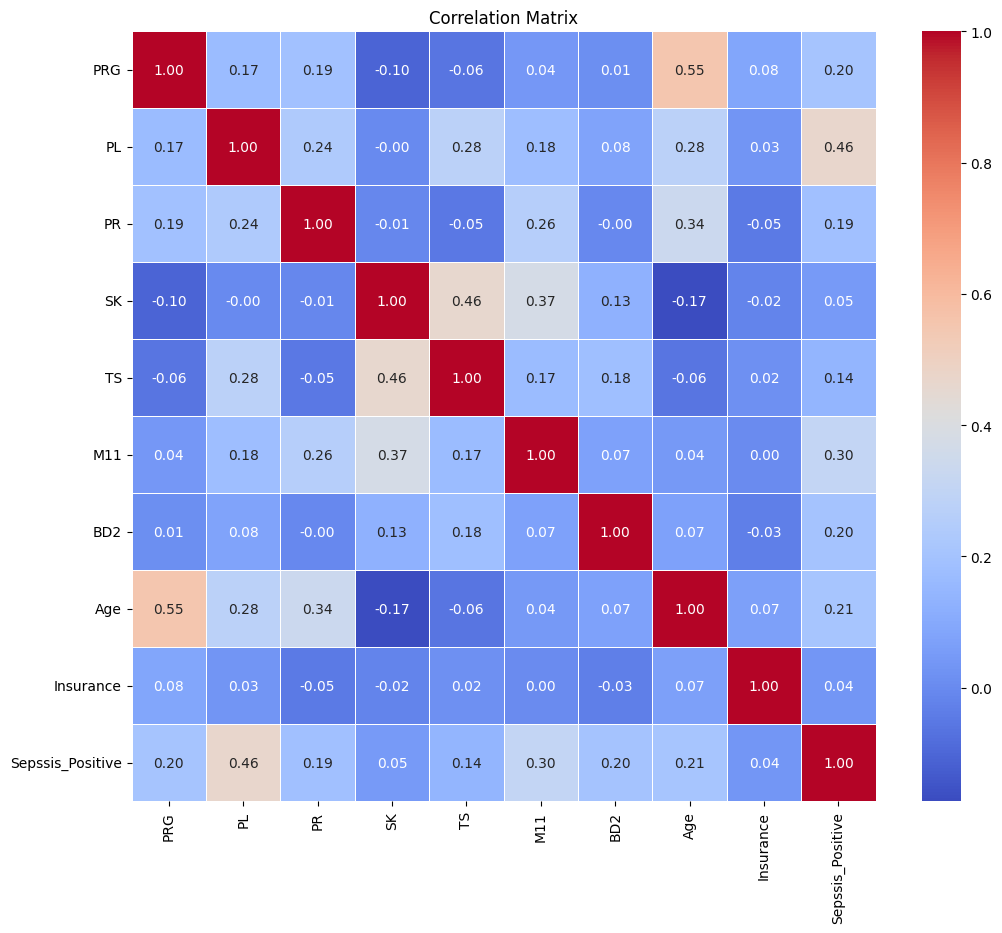

In [27]:
# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(Patients_train_no_outliers.drop('ID',axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [24]:
Patients_train

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis_Positive
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,True
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,False
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,True
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,False
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,True
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,False
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,True
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,False
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,False
